# Portfolio Exercise: Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
## Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

## Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, your goal is to maximize the following metrics:

**Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}}$$


**Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

## How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outcomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

---

# TL;DR

> [GitHub Repo](https://github.com/ZacksAmber/Starbucks)<br>
> [Kaggle Notebook](https://www.kaggle.com/zacksshen/starbucks)

In this research, I explored the relationship between different promotion strategies and purchases from Starbucks. I am curious about two questions:

1. Do promotions bring more purchases, leading to revenue increment?
2. If so, how to maximize the purchase, resulting in a better Incremental Response Rate(IRR) and Net Incremental Revenue(NIR)?

Therefore, there are one prerequisite and two main parts to answer the above questions:

- Exploratory Data Analysis
- Part I: Applying A/B Testing for answering the 1st question.
- Part II: Implementing Machine Learning for answering the 2nd question.

---

# Motivation

Traditional A/B tests, such as UX design for a website, have no additional cost once the experiment and the website upgrade are done. But what if you have extra and continuous expenses from the new strategy, which comes from the positive feedback of the A/B test? Is this positive change in your business worth the additional costs?

In this case, we have some potential customers who are only willing to purchase with a promotion. **Every promotion costs 0.15 USD, while every sold product earns 10 USD**. If we send out promotions to inactive customers who will never purchase, we lose **0.15 USD**. Therefore, the best way to find out proactive customers and send out promotions to them as many as possible.

---

# Conclusions

In this research, we explored how to combine A/B Testing & Machine Learning for powering a real-world target marketing problem. By analyzing the samples with randomly assigned promotions, we conclude that promotions positively impact purchases. Then we trained and tuned Machine Learning models to maximize the IRR & NIR.

## Conclusion of Exploratory Data Analysis

There are 7 features (`V1` to `V7`), 1 target (`purchase`), and one more feature (`Promotion`), which is the model prediction. In the dataset `../data/training.csv`, `Promotion` was randomly assigned with the value `'Yes'` or `'No'` by Starbucks for evaluating the promotions.

- There is no Missing Values issue.
- There is an Imbalanced Dataset issue and we will handle it in the Machine Learning part.
- There is no Outliers issue.

## Conclusion of Part I: A/B Testing

$$\displaystyle IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}}$$
$$\displaystyle H_0: IRR = 0$$
$$\displaystyle H_1: IRR > 0$$
$$\displaystyle \alpha = 0.05$$
$$\displaystyle p-value = 5.55 \times 10^{-36}$$

With the p-value of $5.55 \times 10^{-36}$, which is extremely small, we can reject the null hypothesis, which states that there is no difference between the two groups. And we are more than 99% confident that there is a statistically significant difference in purchase rate between the control and treatment. This means that the promotion has had a significant impact on the purchase rate. Therefore, we can infer that the promotion has been successful in increasing the purchase rate compared to the control group where no promotion was provided. We can recommend the continuation of the promotion strategy to increase sales.

It's important to note that statistical significance does not necessarily imply practical significance. And for this research, there is pre-defined practical significance. But the randomly assigned `Promotion` in `training.csv` shows that, with a `Promotion`, the `purchase` increased by **125%**. It means, by applying Machine Learning for better sending out promotions, we can get a better IRR.

---

## Conclusion of Part II: Machine Learning

My tuned model with proper hyperparameters can significantly increase the IRR and NIR. Therefore, Starbucks should apply this ML model as an IRR and NIR improvement promotion strategy. The function made by Starbucks from `src/test_results.py` has an IRR of 0.0188 and a NIR of $189.45.

- In comparison to the basic IRR (Random-promotion strategy), my solution increased IRR by **0.0109**, or **114.73%**;
- In comparison to the Starbucks IRR (Starbucks-promotion strategy), my solution increased IRR by **0.0016**, or **8.51%**;

![IRR Line Plot](https://github.com/ZacksAmber/Starbucks/blob/main/reports/img/irr_line_plot.png?raw=true)

- In comparison to the basic NIR (Random-promotion strategy), my solution increased NIR by 2853.5;
- In comparison to the Starbucks NIR (Starbucks-promotion strategy), my solution increased NIR by 329.45, or 173.90%;

![NIR Line Plot](https://github.com/ZacksAmber/Starbucks/blob/main/reports/img/nir_line_plot.png?raw=true)

---

# Packages and Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from statsmodels.stats.proportion import proportions_ztest, proportion_effectsize
from statsmodels.stats.power import NormalIndPower
from scipy.stats import binom

# import sys
# sys.path.append('../src')  # add src/ to kernel path
# from test_results import score, test_results

%matplotlib inline

In [2]:
# evaluation function from Starbucks
def score(df, promo_pred_col = 'Promotion'):
    n_treat       = df.loc[df[promo_pred_col] == 'Yes',:].shape[0]
    n_control     = df.loc[df[promo_pred_col] == 'No',:].shape[0]
    n_treat_purch = df.loc[df[promo_pred_col] == 'Yes', 'purchase'].sum()
    n_ctrl_purch  = df.loc[df[promo_pred_col] == 'No', 'purchase'].sum()
    irr = n_treat_purch / n_treat - n_ctrl_purch / n_control
    nir = 10 * n_treat_purch - 0.15 * n_treat - 10 * n_ctrl_purch
    return (irr, nir)
    
# evaluation function from Starbucks
def test_results(promotion_strategy):
    test_data = pd.read_csv('https://raw.githubusercontent.com/ZacksAmber/Starbucks/main/data/Test.csv')
    df = test_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]
    promos = promotion_strategy(df)
    score_df = test_data.iloc[np.where(promos == 'Yes')]    
    irr, nir = score(score_df)
    print("Nice job!  See how well your strategy worked on our test data below!")
    print()
    print('Your irr with this strategy is {:0.4f}.'.format(irr))
    print()
    print('Your nir with this strategy is {:0.2f}.'.format(nir))
    
    print("We came up with a model with an irr of {} and an nir of {} on the test set.\n\n How did you do?".format(0.0188, 189.45))
    return irr, nir

---

# Exploratory Data Analysis

In [3]:
# load data
train_data = pd.read_csv("https://raw.githubusercontent.com/ZacksAmber/Starbucks/main/data/training.csv")
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044331,-0.385883,1,1,2,2


In [4]:
train_data.dtypes

ID             int64
Promotion     object
purchase       int64
V1             int64
V2           float64
V3           float64
V4             int64
V5             int64
V6             int64
V7             int64
dtype: object

In [5]:
train_data.describe()

,ID,purchase,V1,V2,V3,V4,V5,V6,V7
count,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000
mean,62970.972413,0.012303,1.500662,29.973600,0.000190,1.679608,2.327643,2.502898,1.701694
std,36418.440539,0.110234,0.868234,5.010626,1.000485,0.466630,0.841167,1.117349,0.457517
min,1.000000,0.000000,0.000000,7.104007,-1.684550,1.000000,1.000000,1.000000,1.000000
25%,31467.250000,0.000000,1.000000,26.591501,-0.905350,1.000000,2.000000,2.000000,1.000000
50%,62827.500000,0.000000,2.000000,29.979744,-0.039572,2.000000,2.000000,3.000000,2.000000
75%,94438.750000,0.000000,2.000000,33.344593,0.826206,2.000000,3.000000,4.000000,2.000000
max,126184.000000,1.000000,3.000000,50.375913,1.691984,2.000000,4.000000,4.000000,2.000000


Target:
- `purchase`: Nominal

Features:
- `V1`: categorical (nominal or ordinal)
- `V2`: numeric
- `V3`: numeric
- `V4`: categorical (nominal or ordinal)
- `V5`: categorical (nominal or ordinal)
- `V6`: categorical (nominal or ordinal)
- `V7`: categorical (nominal or ordinal)

Since we have very limited understanding in features `V1` to `V7`, we should skip feature engineering and focus on part 1: A/B testing, and part 2: Machine Learning.

---

## Data Cleansing

### Missing Values

As we can see there is no missing values issue here.

In [6]:
train_data.isnull().mean()

ID           0.0
Promotion    0.0
purchase     0.0
V1           0.0
V2           0.0
V3           0.0
V4           0.0
V5           0.0
V6           0.0
V7           0.0
dtype: float64

### Imbalanced Datasets

The target `purchase` is only 1.7% of the experimental group. Let's say a model predicting 100% people of experimental group will not make a purchase. We still get 98.3% of True Negative data, and 1.7% of False Negative, 98.3% of Accuracy.

We have some methods such as oversampling for imbalanced datasets, and we will handle this issue later.

In [7]:
train_data[train_data.Promotion == "Yes"].purchase.mean()

0.017019167217448776

### Outliers

As we can see, only feature `V2` has a few outliers, so we will skip this step.

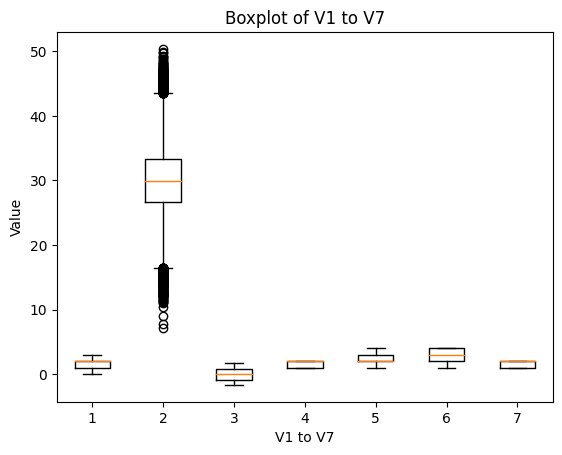

In [8]:
# Create a boxplot of features
fig, ax = plt.subplots()
ax.boxplot(train_data[["V1", "V2", "V3", "V4", "V5", "V6", "V7"]])

# Set the title and axis labels
ax.set_title("Boxplot of V1 to V7")
ax.set_xlabel("V1 to V7")
ax.set_ylabel("Value")

# Show the plot
plt.show()

In [9]:
# Analyze feature V2
# Calculate the z-scores for each data point
z_scores = (train_data["V2"] - train_data["V2"].mean()) / train_data["V2"].std()

# Set a threshold for identifying outliers
threshold = 3

# Find the indices of the outliers
outlier_indices = np.where(
    (np.abs(z_scores) < -threshold) | (np.abs(z_scores) > threshold)
)

# Print the ratio of outliers
print("Ratio of outliers:", len(outlier_indices) / train_data["V2"].shape[0])

Ratio of outliers: 1.1829559703787825e-05


<Axes: ylabel='Frequency'>

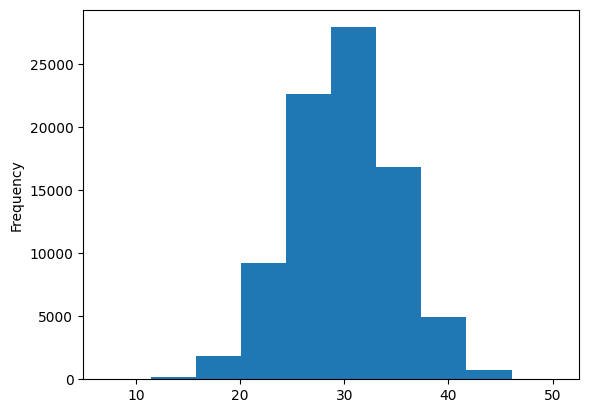

In [10]:
train_data["V2"].plot.hist()

---

## Key Metrics: IRR & NIR

**Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


**Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

In [11]:
# define Group A as g1, Group B as g2
g1 = train_data[(train_data.Promotion == "No")]
g2 = train_data[(train_data.Promotion == "Yes")]
# get the sample size of g1 & g2
n1 = g1.shape[0]
n2 = g2.shape[0]
n = n1 + n2
# get the number of purchase of g1 & g2
k1 = g1[g1.purchase == 1].shape[0]
k2 = g2[g2.purchase == 1].shape[0]

In [12]:
# IRR baseline
IRR = k2 / n2 - k1 / n1  # 0.009454547819772702
print(IRR)

0.009454547819772702


To maximize IRR, we should:
- maximize k2, n1
- minimize n2, k1

In [13]:
# NIR baseline
NIR = (k2 * 10) - n2 * 0.15 - k1 * 10  # -2334.5999999999995
print(NIR)

-2334.5999999999995


To maximize NIR, we should:
- maximize k2
- minimize n2, k1

---

## Data/Business Understanding

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

Therefore, we have 4 types of customers:

|Type|Result|Promotion|Purchase|Net Profit (\$)|
|:-:|:-:|:-:|:-:|:-:|
|I|TP|1|1|9.85|
|II|FP|1|0|-0.15|
|III|FN|0|1|10|
|IV|TN|0|0|0|

Explanations:
- Type I: True Positive. We predict this customer will make a purchase so we send out a promotion. And this customer indeed makes a purchase. If promotion can increase the purchase rate, it's a good deal to get this extra income.
- Type II: False Positive. We predict this customer will make a purchase so we send out a promotion. But this customer doesn't make a purchase. FP (also called Type I Error) is the metric we really should decrease since it hurts Starbucks' Net Profit.
- Type III: False Negative. We predict this customer will not make a purchase so we don't send out any promotions. But this customer in actual makes a purchase. It's the best to have this kind of loyal customers since they can make a purchase without any promotions. But we would better to identify FN (also called Type II Error) for other marketing strategies.
- Type IV: True Negative. We predict this customer will not make a purchase so we don't send out any promotions. And this customer indeed makes no purchase.

---

# Part I: A/B Testing

In this part, we need to make a purchase funnel for better understanding the flow of a typical customer. Then we need to run an A/A test for checking the invariant metric and run an A/B test for checking the evaluation metric.

---

## General A/B Testing Flowchart

![General A/B Testing Flowchart](https://raw.githubusercontent.com/ZacksAmber/Flowcharts/main/general_ab_testing.svg)

I made this General A/B Testing Flowchart as a guideline for this project. Since this is a simplified project, we don't have to 100% follow the flowchart. But the main steps are still meaningful.

---

## [Purchase Funnel](https://en.wikipedia.org/wiki/Purchase_funnel)

![Purchase Funnel](../reports/img/purchase_funnel.png)

In this project, the simplified purchase funnel is very easy to understand. There is no further steps. A Starbucks customer with or without promotion may make a purchase or may not.

Also, for simplifying the whole process, this project already provided invariant metric number of customers and evaluation metric IRR and NIR. Thus we don't have to do any analysis about metric selection.

---

## Calculating the Minimum Sample Size: Power Analysis

Well, this assignment didn't define a practical significance. But we can still use the current purchases rate (p1, p2) as baseline, with $\alpha=.05$, $\beta=.20$. And see does the sample size big enough to support the A/B Testing conclusion. 

In [14]:
# define alpha and beta
alpha = 0.05
beta = 0.20
power = 1 - beta

# calculate purchase rate from group 1 and group 2 as baseline
p1 = k1 / n1
p2 = k2 / n2
print(
    f"""
Purchase Rate of Control: {p1}
Purchase Rate of Treatment: {p2}
Purchase Rate Diff (p2 - p1): {p2 - p1}
Purchase Rate Diff Ratio ((p2-p1) / p1): {(p2-p1) / p1}
"""
)


Purchase Rate of Control: 0.007564619397676073
Purchase Rate of Treatment: 0.017019167217448776
Purchase Rate Diff (p2 - p1): 0.009454547819772702
Purchase Rate Diff Ratio ((p2-p1) / p1): 1.2498378732282596



Although Purchase Rate Diff: .95% is a very small number, Purchase Rate Diff Ratio is a huge number, 125%!

In [15]:
# power analysis for sample size
power_analysis = NormalIndPower()
power_analysis.solve_power(
    effect_size=proportion_effectsize(p2, p1),
    alpha=alpha,
    power=power,
    alternative="larger",
)

1615.3610613913452

In [16]:
# number of customers from group 1 and group 2
print(
    f"""
Number of Customers from Control: {n1}
Number of Customers from Treatment: {n2}
"""
)


Number of Customers from Control: 42170
Number of Customers from Treatment: 42364



$cust_{ctrl} = 42170 > 1616, cust_{treat} = 42364 > 1616$. We can safely perform A/B Testing and the result is robust enough to prove the conclusion.

You can also do Power Analysis through [G\*Power](https://www.psychologie.hhu.de/arbeitsgruppen/allgemeine-psychologie-und-arbeitspsychologie/gpower).

![Sample Size](https://github.com/ZacksAmber/Starbucks/blob/main/reports/img/sample_size.png?raw=true)

In [17]:
# power analysis for sample size
power_analysis = NormalIndPower()
power_analysis.solve_power(
    effect_size=proportion_effectsize(p2, p1),
    nobs1=n1,
    alpha=alpha,
    alternative="larger",
)

1.0

With those huge sample size, we even have power = 1.

![Power](https://github.com/ZacksAmber/Starbucks/blob/main/reports/img/power.png?raw=true)

---

## Checking the Invariant Metric: A/A Testing

A/A Testing is for checking the invariant metric - number of customers.  If there is a statistically significant difference detected, then we shouldn't move on to the evaluation metrics right away. We must ensure that the random sampling fairly assigned samples to control and treatment group. In this project, $cust_{ctrl}$ should be equal to $cust_{treat}$. So does 42170 is close to 42364? We need to run a one-proportion Z-test.

$$ H_0: cust_{ctrl} = cust_{treat} $$
$$ H_1: cust_{ctrl} \neq cust_{treat} $$
$$p-value = 0.5$$

With a p-value of 0.5, we fail to reject the Null Hypothesis at the 0.05 level of significance. Therefore, there is not enough evidence to suggest that the number of customers in the treatment group is significantly different from the number of customers in the control group.

In [18]:
# number of customers from group 1 and group 2
print(
    f"""
Number of Customers from Control: {n1}
Number of Customers from Treatment: {n2}
"""
)


Number of Customers from Control: 42170
Number of Customers from Treatment: 42364



In [19]:
# One-proportion z-test for Invariant Metric number of customers (n1 & n2)
zstat, pval = proportions_ztest(
    count=n1, nobs=n, value=0.5, alternative="two-sided", prop_var=False
)
zstat, pval

(-0.6672478204244043, 0.5046138502146766)

---

## Checking the Evaluation Metric: A/B Testing

A/B Testing is for checking the evaluation metric purchase rate. Two-proportion Z-test assumes the data is normal distributed. We will use some Nonparametric testing later.

$$\displaystyle IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}}$$
$$\displaystyle H_0: IRR = 0$$
$$\displaystyle H_1: IRR > 0$$
$$\displaystyle p-value = 5.55 \times 10^{-36}$$

With a p-value of 5.55×10^-36, which is extremely small, we should reject the Null Hypothesis, which states that there is no difference between the two groups. And we are more than 99% confident that there is a statistically significant difference in purchase rate between the control group and the treatment group. This means that the promotion has a significantly positive impact on the purchase rate. Therefore, we can infer that the promotion has been successful in increasing the purchase rate compared to the control group where no promotion was provided. We can recommend the continuation of the promotion strategy to increase sales.

It's important to note that statistical significance does not necessarily imply practical significance. And for this project, there is pre-defined practical significance. But the randomly assigned `Promotion` in `training.csv` shows that, with a `Promotion`, `purchase` increased by **125%**. It means, by applying Machine Learning for better sending out promotions, we can get a better IRR.

In [20]:
# Two-proportion pooled z-test for Evaluation Metric - Purchase Rate
d0 = 0  # assume there is no difference between two groups
count = [k2, k1]
nobs = [n2, n1]

zstat, pval = proportions_ztest(
    count,
    nobs,
    value=d0,  # null hypothesis
    alternative="larger",
    prop_var=False,  # pooled
)
zstat, pval

(12.468449461599388, 5.548209627035781e-36)

---

## (Optional Non-parametric Tests) Sign Test

To run the above two-proportion Z-test for checking the evaluation metric, we assume the sample data is normal distributed according to [Central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

To run a non-parametric test for an independent check, we don't assume that the sample data is normal distributed. In this case, I will use sign test, one of the non-parametric test, to perform the hypothesis testing again.

$$\displaystyle IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}}$$
$$\displaystyle H_0: IRR = 0$$
$$\displaystyle H_1: IRR > 0$$
$$\displaystyle p-value = 1.93 \times 10^{-83}$$

The purchase rate $p$ is boolean, so it's binomial distributed. The following code shows under the sample size `n=n2` and `p=p1`, the probability of observing number of `k2` purchases. $p-value = 1.93 \times 10^{-83}$ is an extremely small number, which means we have almost 0 chance to observe this result. Therefore, this is not due to random chance. And we should reject the null hypothesis $\displaystyle H_0: IRR = 0$ and conclude that the promotion did increase the purchase rate. In other words, the independent sign test maintains the same conclusion as the above A/B test (two-proportion Z-test).

In [21]:
binom(n=n2, p=p1).sf(k2)

1.9327527524284637e-83

---

## A/B Testing Conclusion

---

# Part II: Machine Learning

Now we already know that randomly assigned promotions did increase the purchase rate. However, remember we have a cost of $0.15 for every promotion. It means we should not send out promotions to all of the customers. What if we do so?

As a reminder:

In [22]:
print(
    f"""
Baseline of IRR: {IRR}
Baseline of NIR: {NIR}
"""
)


Baseline of IRR: 0.009454547819772702
Baseline of NIR: -2334.5999999999995



In [23]:
# if we send out promotions to all of the customers
def promotion_strategy(df):
    promotion = np.array(["Yes"] * df.shape[0])

    return promotion

all_irr, all_nir = test_results(promotion_strategy)
all_irr, all_nir

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0096.

Your nir with this strategy is -1132.20.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.009593158278250108, -1132.1999999999998)

If every customer has a promotion, we have almost the same IRR of 0.0096. It's not surprising since promotions were randomly assigned to the sample dataset. And we did increase the NIR, which is now $-1132.20. But it is still a negative number. We should not run a promotion strategy for lowering the NIR.

So can we apply a better promotion strategy by Machine Learning for a higher IRR and NIR?

---

## General Machine Learning Flowchart

![General Machine Learning Flowchart](https://raw.githubusercontent.com/ZacksAmber/Flowcharts/main/general_ab_testing.svg)

I made this General Machine Learning Flowchart as a guideline for this project. Since this is a simplified project, we don't have to 100% follow the flowchart. But the main steps are still meaningful.

---

## Feature Selection

Technically speaking, we need to run heatmap of correlation coefficient or mutual information for feature selection. However, `../src/test_results.py` shows that the test function will take all features. To simplify the question, we will take every feature for Machine Learning.

---

## Model Selection

The target variable `purchase` is labeled data. Thus supervised learning is the best choice; `purchase` is also a boolean variable. Therefore, we need to pick a classifier for this classification problem.

I took three commonly used supervised classification ML algorithms as Model Baselines with default arguments and a fixed `random_state`. Please review [Model Baseline.ipynb](../notebooks/Model_Baseline.ipynb) for more info.

The results are stored in [../reports/baselines/model_baseline.csv](https://raw.githubusercontent.com/ZacksAmber/Starbucks/main/reports/baselines/model_baseline.csv).

As we can see, XGBoost Classifier has better performance than Random Forest Classifier and Logistic Regression. Also, in comparison to the baseline of IRR, NIR, and the IRR and NIR from 'all promotion strategy', even the basic untuned model can beat them.

In [24]:
pd.read_csv("https://raw.githubusercontent.com/ZacksAmber/Starbucks/main/reports/baselines/model_baseline.csv")

,Model,IRR,NIR
0,Random Forest Classifier,0.000000,-2.40
1,Logistic Regression,0.015140,18.40
2,XGBoost Classifier,0.022779,137.65


---

## Metric Selection

As we have our choice of the ML model. It's time to pick a metric for scoring the model. Here are the analysis and tables from Data/Business Understanding part.

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

Therefore, we have 4 types of customers associated with test results:

|Type|Result|Promotion|Purchase|Net Profit (\$)|
|:-:|:-:|:-:|:-:|:-:|
|I|TP|1|1|9.85|
|II|FP|1|0|-0.15|
|III|FN|0|1|10|
|IV|TN|0|0|00|

Explanations:

- Type I: True Positive. We predict this customer will purchase, so we are sending out a promotion. And this customer indeed purchases the product. Although we pay $0.15 for the promotion, it can increase the purchase rate (we proved this in the A/B Test part). So it is still a good deal.
- Type II: False Positive. We predict this customer will purchase, so we are sending out a promotion. But this customer makes no purchase. FP (Type I Error) is the metric we really should decrease since it hurts Starbucks' Net Profit.
- Type III: False Negative. We predict this customer will not purchase, so we don’t send out any promotions. But this customer actually purchases the product. It’s good to have this kind of loyal customer since they can purchase without any promotions. But we would better identify FN (Type II Error) for further marketing strategies. And make them long-term loyal customers.
- Type IV: True Negative. We predict this customer will not make a purchase, so we don’t send out any promotions. And this customer indeed makes no purchase.

In this case, either increasing the TP rate or lowering the FP rate is beneficial for Starbucks' Key Metrics -- IRR, and NIR.

- $\displaystyle Recall \space Score \space (TPR) = \frac{TP}{TP + FN}$
- $\displaystyle Precision \space Score \space (PPV) = \frac{TP}{TP + FP}$
- $\displaystyle Treat \space Score \space (PPV) = \frac{TP}{TP + FN + FP}$

Therefore, we have three directions for tuning the model - Recall, Precision, or Treat Score. I will also make a metric baseline with commonly used metrics such as accuracy, roc_auc, and f1 score.

Notice the IRR and NIR formulas use different metrics than the commonly used scorers. I made three customized scorers for this project to compete with the above scorers - `irr_score`, `nir_score`, and `irr_nir_score`. But they are not exactly the formulas of IRR and IRR. They cannot be the same but can be close to the formulas. If we do so, there is data leakage.

In [25]:
# define irr score
def irr_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fp) - fn / (fn + tn)


# define nir score
def nir_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (10 * tp - 0.15 * (tp + fp)) - 10 * fn


# combine irr score and nir score together
def irr_nir_score(y_true, y_pred):
    irr = irr_score(y_true, y_pred)
    nir = nir_score(y_true, y_pred)
    return irr * nir

The [Metric_Baseline](../notebooks/Metric_Baseline.ipynb) notebook tunned a XGBClassifier 500 rounds per metric for making the metric baseline. The results are in `../reports/baselines/metric_baseline.csv`.

Next, we will tune the model with the top three metrics of NIR - irr_score, treat_score, and roc_auc.

In [26]:
metric_baseline = pd.read_csv("https://raw.githubusercontent.com/ZacksAmber/Starbucks/main/reports/baselines/metric_baseline.csv").sort_values(
    "nir", ascending=False
)
metric_baseline = metric_baseline.reset_index(drop=True)
metric_baseline

,scoring,score,irr,nir,n_promotions,n_trials,best_params
0,make_scorer(irr_score),0.018176,0.020440,518.90,19463,500,"{'max_depth': 2, 'learning_rate': 0.0214920286..."
1,make_scorer(treat_score),0.026832,0.020738,488.20,17313,500,"{'max_depth': 4, 'learning_rate': 0.0119184497..."
2,roc_auc,0.656640,0.020359,469.05,17835,500,"{'max_depth': 4, 'learning_rate': 0.0131945820..."
3,f1,0.052957,0.020263,438.40,17263,500,"{'max_depth': 4, 'learning_rate': 0.0104123945..."
4,precision,0.029975,0.021447,243.45,7555,500,"{'max_depth': 7, 'learning_rate': 0.0671030022..."
5,accuracy,0.952672,0.014332,-5.90,1810,500,"{'max_depth': 7, 'learning_rate': 0.0985469859..."
6,make_scorer(irr_nir_score),1.885476,0.014540,-62.55,28006,500,"{'max_depth': 1, 'learning_rate': 0.0267492934..."
7,recall,0.855563,0.014231,-107.90,28355,500,"{'max_depth': 1, 'learning_rate': 0.0128012149..."
8,make_scorer(nir_score),109.440000,0.014231,-107.90,28355,500,"{'max_depth': 1, 'learning_rate': 0.0348369824..."


---

## Model Tunning

The [Model_Tuning](../notebooks/Model_Tuning.ipynb) notebook tunned a XGBClassifier 5,000 rounds per metric for the top 3 metrics. As we already have some model with good performance, we can narrow down the tuning directions from those hyperparameters from `../reports/baselines/metric_baseline.csv`. The results are in `../reports/tuning_results/model_tuning.csv`.

In [27]:
model_tuning = pd.read_csv("https://raw.githubusercontent.com/ZacksAmber/Starbucks/main/reports/tuning_results/model_tuning.csv").sort_values(
    "nir", ascending=False
)
model_tuning

,scoring,score,irr,nir,n_promotions,n_trials,best_params
2,make_scorer(irr_score),0.018679,0.019554,380.05,17196,5000,"{'max_depth': 3, 'learning_rate': 0.0262949073..."
1,make_scorer(treat_score),0.027801,0.019580,364.40,16311,5000,"{'max_depth': 4, 'learning_rate': 0.0275601747..."
0,roc_auc,0.662547,0.018867,341.80,18058,5000,"{'max_depth': 4, 'learning_rate': 0.0136341240..."


The results show that after 5,000 rounds of model tuning, the score was increased.

In [28]:
_df1 = metric_baseline.loc[:3, ["scoring", "score"]]
_df2 = model_tuning[["scoring", "score"]]
_df = pd.merge(_df1, _df2, on="scoring")
_df.rename(columns={"score_x": "basic score", "score_y": "tuned score"}, inplace=True)
_df["diff"] = _df["tuned score"] - _df["basic score"]
_df["ratio"] = _df["tuned score"] / _df["basic score"]
_df

,scoring,basic score,tuned score,diff,ratio
0,make_scorer(irr_score),0.018176,0.018679,0.000503,1.027665
1,make_scorer(treat_score),0.026832,0.027801,0.000969,1.036105
2,roc_auc,0.656640,0.662547,0.005906,1.008995


However, the IRR and NIR are dramatically decrease. I don't think this an overfitting issue since I applied some techniques such as cross validation for prevent from overfitting. I guess this is because, as I mentioned above, the scorers we used for providing feedbacks to the model tuning function are not exactly the same metrics as IRR and NIR. Hence we got a better score but worse IRR and NIR.

Notice this is not meant the scorers are negative related to IRR and NIR. This is a curve, and the best way is to find the balanced point.

In [29]:
_df1 = metric_baseline.loc[:3, ["scoring", "irr", "nir"]]
_df2 = model_tuning[["scoring", "irr", "nir"]]
_df = pd.merge(_df1, _df2, on="scoring")
_df.rename(
    columns={
        "irr_x": "basic irr",
        "irr_y": "tuned irr",
        "nir_x": "basic nir",
        "nir_y": "tuned nir",
    },
    inplace=True,
)
_df["irr diff"] = _df["tuned irr"] - _df["basic irr"]
_df["irr ratio"] = _df["tuned irr"] / _df["basic irr"]
_df["nir diff"] = _df["tuned nir"] - _df["basic nir"]
_df["nir ratio"] = _df["tuned nir"] / _df["basic nir"]
_df = _df[
    [
        "scoring",
        "basic irr",
        "tuned irr",
        "irr diff",
        "irr ratio",
        "basic nir",
        "tuned nir",
        "nir diff",
        "nir ratio",
    ]
]
_df

,scoring,basic irr,tuned irr,irr diff,irr ratio,basic nir,tuned nir,nir diff,nir ratio
0,make_scorer(irr_score),0.020440,0.019554,-0.000886,0.956643,518.90,380.05,-138.85,0.732415
1,make_scorer(treat_score),0.020738,0.019580,-0.001158,0.944181,488.20,364.40,-123.80,0.746415
2,roc_auc,0.020359,0.018867,-0.001492,0.926726,469.05,341.80,-127.25,0.728707


---

## ML Conclusion

As the the conclusion, I prefer the following ML strategy for maximizing the IRR and NIR:
- Model: XGBoost Classifier
- Features: All
- Metric: irr scorer (customized by `tp / (tp + fp) - fn / (fn + tn)`)
- IRR: 0.02044
- NIR: 518.9
- Hyperparameters: `{'max_depth': 2, 'learning_rate': 0.021492028660464936, 'n_estimators': 150, 'gamma': 0.36845846324372045, 'subsample': 0.5231164896905167, 'colsample_bytree': 0.9518652110310841, 'reg_alpha': 3.226360958881916, 'reg_lambda': 9.115116073351663, 'min_child_weight': 32}`

My tuned model with proper hyperparameters can significantly increase the IRR and NIR. Therefore, Starbucks should apply this ML model as an IRR and NIR improvement promotion strategy.

- In comparison to the basic IRR (Random-promotion strategy), my solution increased IRR by 0.0109, or 114.73%;
- In comparison to the basic NIR (Random-promotion strategy), my solution increased NIR by 2853.5;
- In comparison to the Starbucks IRR (Starbucks-promotion strategy), my solution increased IRR by 0.0016, or 8.51%;
- In comparison to the Starbucks NIR (Starbucks-promotion strategy), my solution increased NIR by 329.45, or 173.90%;

In [30]:
metric_baseline.iloc[0]

scoring                                    make_scorer(irr_score)
score                                                    0.018176
irr                                                       0.02044
nir                                                         518.9
n_promotions                                                19463
n_trials                                                      500
best_params     {'max_depth': 2, 'learning_rate': 0.0214920286...
Name: 0, dtype: object

In [31]:
best_irr = metric_baseline.iloc[0].irr
best_nir = metric_baseline.iloc[0].nir
print(metric_baseline.loc[0, "best_params"])

{'max_depth': 2, 'learning_rate': 0.021492028660464936, 'n_estimators': 150, 'gamma': 0.36845846324372045, 'subsample': 0.5231164896905167, 'colsample_bytree': 0.9518652110310841, 'reg_alpha': 3.226360958881916, 'reg_lambda': 9.115116073351663, 'min_child_weight': 32}


In [32]:
df = pd.DataFrame(
    {
        "Label": ["Random-promotion", "All-promotion", "Starbucks-promotion", "Best-promotion"],
        "IRR": [round(IRR, 4), round(all_irr, 4), 0.0188, round(best_irr, 4)],
        "NIR": [round(NIR, 2), round(all_nir, 2), 189.45, round(best_nir, 2)],
    }
)

df

,Label,IRR,NIR
0,Random-promotion,0.0095,-2334.60
1,All-promotion,0.0096,-1132.20
2,Starbucks-promotion,0.0188,189.45
3,Best-promotion,0.0204,518.90


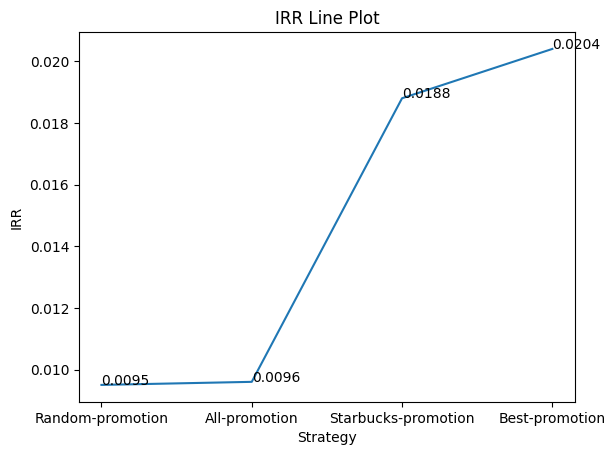

In [33]:
# Create line plot for IRR
x, y = df.Label, df.IRR
plt.plot(x, y)

# Annotate each y value
for i, j in zip(x, y):
    plt.annotate(str(j), xy=(i, j))

# Add x and y axis labels
plt.xlabel("Strategy")
plt.ylabel("IRR")

# Add title
plt.title("IRR Line Plot")

# Save plot
# plt.savefig('irr_line_plot.png')

# Show plot
plt.show()

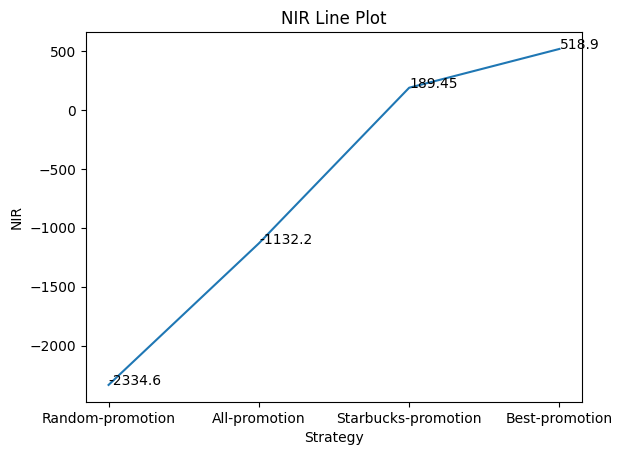

In [34]:
# Create line plot for IRR
x, y = df.Label, df.NIR
plt.plot(x, y)

# Annotate each y value
for i, j in zip(x, y):
    plt.annotate(str(j), xy=(i, j))

# Add x and y axis labels
plt.xlabel("Strategy")
plt.ylabel("NIR")

# Add title
plt.title("NIR Line Plot")

# Save plot
# plt.savefig('nir_line_plot.png')

# Show plot
plt.show()